# Leitura e visualização da imagem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = plt.imread('cameraman.tiff')
print('Objeto:', type(img))
print('Tipo de dado de cada pixel:', img.dtype)
print('Tamanho da imagem:', img.shape)
print('Valor máximo:', img.max())
print('Valor mínimo:', img.min())

Objeto: <class 'numpy.ndarray'>
Tipo de dado de cada pixel: uint8
Tamanho da imagem: (256, 256)
Valor máximo: 253
Valor mínimo: 7


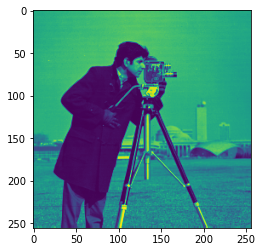

In [2]:
# Mostra a imagem. 
# Por padrão, o matplotlib faz um mapeamento dos valores 0 a 255 na imagem para 
# as cores do mapa de cores viridis (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
plt.imshow(img)

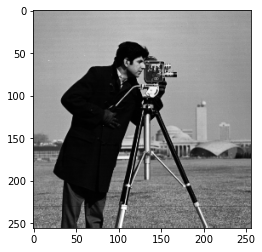

In [3]:
# Mostra a imagem utilizando mapa de cores nível de cinza
plt.imshow(img, cmap='gray')

In [5]:
# Imprime a primeira linha da imagem
print(img[0])

[156 159 158 155 158 156 159 158 157 158 158 159 160 160 160 158 163 161
 162 160 164 160 165 163 161 163 161 164 165 162 161 165 165 164 166 165
 164 166 167 165 165 164 170 166 167 167 170 168 169 166 169 167 170 169
 169 171 169 171 169 171 170 169 173 173 172 171 173 176 174 176 180 179
 178 178 181 181 181 177 180 178 179 180 180 180 178 184 181 182 183 182
 183 181 182 183 182 185 184 181 181 183 184 183 184 183 186 186 187 184
 183 185 185 185 182 183 186 182 184 187 185 188 185 185 186 184 184 182
 186 186 185 181 186 182 182 185 183 180 181 182 181 185 182 186 182 181
 183 182 181 181 181 179 181 177 180 181 178 178 180 179 180 177 179 180
 178 176 178 174 177 178 173 177 177 176 172 172 172 176 174 177 173 173
 169 172 169 171 167 167 166 167 168 168 168 168 169 166 169 165 166 166
 166 164 166 169 166 168 166 165 168 167 168 165 166 166 164 163 164 159
 164 164 158 162 162 162 161 159 161 161 159 159 160 155 155 154 155 153
 156 155 158 156 155 155 156 154 151 156 155 152 15

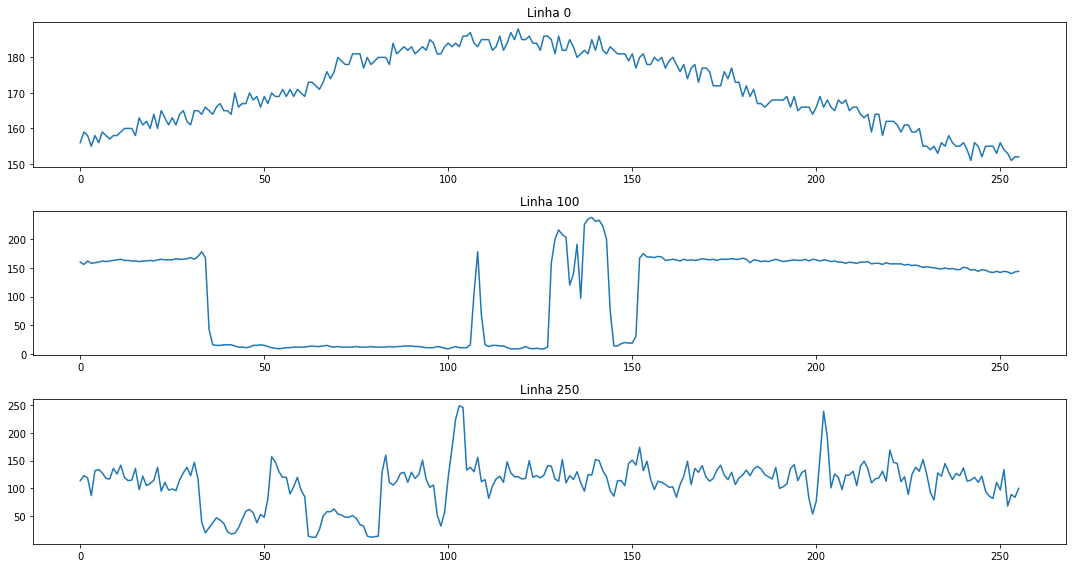

In [6]:
# Plota os valores de três linhas diferentes da imagem
plt.figure(figsize=[15, 8])
plt.subplot(3, 1, 1)
plt.plot(img[0])
plt.title('Linha 0')
plt.subplot(3, 1, 2)
plt.plot(img[100])
plt.title('Linha 100')
plt.subplot(3, 1, 3)
plt.plot(img[250])
plt.title('Linha 250')
plt.tight_layout()

# Transformações de imagens

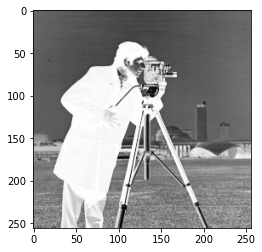

In [7]:
# Negativo, utilizando loops Python
num_linhas, num_cols = img.shape
img_neg = np.zeros((num_linhas, num_cols), dtype=np.uint8)
for row in range(num_linhas):
    for col in range(num_cols):
        img_neg[row, col] = 255 - img[row, col]
plt.imshow(img_neg, 'gray')

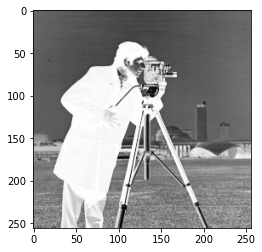

In [8]:
# Negativo, utilizando numpy
img_neg_np = 255 - img
plt.imshow(img_neg_np, 'gray')

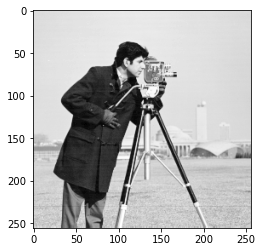

In [9]:
# Logaritmo
c = 255/np.log(256)  # Constante multiplicativa para normalizar os valores
img_log = np.zeros((num_linhas, num_cols), dtype=float)
for row in range(num_linhas):
    for col in range(num_cols):
        img_log[row, col] = c*np.log(1+img[row, col])
plt.imshow(img_log, 'gray')

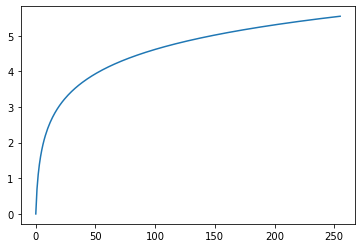

In [10]:
# Visualização da função logaritmo
x = np.arange(0, 256)
y = np.log(1+x)
plt.plot(x, y)

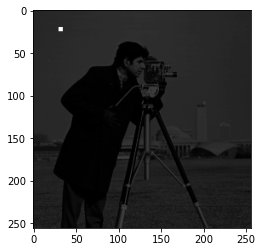

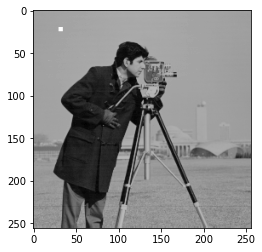

In [11]:
# Simulando uma situação na qual o logaritmo seria util
img_sim = img.astype(float)
img_sim[20:25, 30:35] = 1000
plt.imshow(img_sim, 'gray')
img_sim_log = np.log(img_sim)
plt.figure()
plt.imshow(img_sim_log, 'gray')

In [12]:
# Implementação de uma lookup table logarítmica
c = 255/np.log(256)
lookupTable = np.zeros(256)
for value in range(0, 256):
    lookupTable[value] = c*np.log(1+value)
print(lookupTable)

[  0.          31.875       50.52067971  63.75        74.01145802
  82.39567971  89.48443814  95.625      101.04135942 105.88645802
 110.26938284 114.27067971 117.95151602 121.35943814 124.53213774
 127.5        130.28787806 132.91635942 135.40268949 137.76145802
 140.00511785 142.14438284 144.18853735 146.14567971 148.02291605
 149.82651602 151.56203913 153.23443814 154.84814422 156.40713774
 157.91500739 159.375      160.79006255 162.16287806 163.49589617
 164.79135942 166.05132603 167.27768949 168.47219573 169.63645802
 170.77197015 171.88011785 172.96218906 174.01938284 175.05281745
 176.06353735 177.05251965 178.02067971 178.96887628 179.89791605
 180.80855778 181.70151602 182.57746449 183.43703913 184.28084087
 185.10943814 185.9233692  186.72314422 187.5092472  188.28213774
 189.04225263 189.79000739 190.52579756 191.25       191.96297404
 192.66506255 193.35659295 194.03787806 194.70921706 195.37089617
 196.02318943 196.66635942 197.30065781 197.92632603 198.54359576
 199.15268

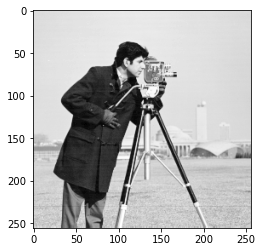

In [13]:
# Transformação de imagem utilizando lookup table
img_log = np.zeros((num_linhas, num_cols), dtype=float)
for row in range(num_linhas):
    for col in range(num_cols):
        img_log[row, col] = lookupTable[img[row, col]]
plt.imshow(img_log, 'gray')

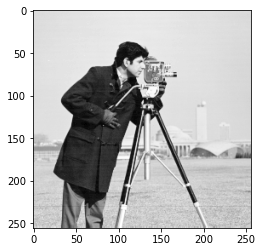

In [14]:
# Transformação usando indexação do numpy
img_log = lookupTable[img.flatten()].reshape(img.shape)
plt.imshow(img_log, 'gray')